In [118]:
#import modules
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling

In [119]:
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

In [9]:
#read files
df2012 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2012.txt", delimiter="|")
df2013 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2013.txt", delimiter="|")
df2014 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2014.txt", delimiter="|")
df2015 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2015.txt", delimiter="|")
df2016 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2016.txt", delimiter="|")

C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (58,104,113,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (25,104,113) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (25,28,30,31,56,104,109,113,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (58,113,

In [10]:
#union dataframes
frames = [df2012, df2013, df2014, df2015, df2016]
df_all = pd.concat(frames)

In [11]:
#loss data
loss = pd.read_excel("C:\Users\pliu\Desktop\starr\Starr_Loss_Data.xlsx")

In [134]:
#zip code cleaning in premium dataset
df_all["Zip_Code"] = df_all["Risk_Location_Postal_Zip_Code"].str[:5].astype(int)

In [135]:
df_all.Risk_Location_Postal_Zip_Code

0              10003
1              10003
2              10003
3              10003
4              10003
5              10003
6              10003
7              10003
8              10003
9              10003
10             10003
11             10003
12             10003
13             10003
14             10003
15             10003
16             10003
17             11749
18             11749
19             11749
20             11749
21             11749
22             11749
23             11749
24             11749
25             11749
26             11749
27             11749
28             11749
29             11749
             ...    
518784    92336-1272
518785    92336-1272
518786    92336-1272
518787    92336-1272
518788    92336-1272
518789    92336-1272
518790    92336-1272
518791    92336-1272
518792    92336-1272
518793    92336-1272
518794    92336-1272
518795    92336-1272
518796    92336-1272
518797    92336-1272
518798    92336-1272
518799    92336-1272
518800    114

## Premium Aggregation

In [13]:
f = {'Written_Premium_Amt': 'sum' }

In [14]:
df_premium = df_all.groupby(["Policy_Number", "Zip_Code", 'ISO_Class_Code', 'ISO_Coverage_Code'], as_index=False).aggregate(f)

In [15]:
df_premium.sort_values("Written_Premium_Amt")

,Policy_Number,Zip_Code,ISO_Class_Code,ISO_Coverage_Code,Written_Premium_Amt
348814,1000356745151,33172,57326,22,-19560.0
68512,1000052425141,33463,63631,21,-17000.0
297916,1000354116151,33173,71865,21,-14538.0
123209,1000054534141,29464,63980,21,-14343.0
147391,1000200452151,33166,65121,21,-10428.0
290965,1000353739141,11803,74541,23,-9927.0
348815,1000356745151,33172,57326,23,-9400.0
78297,1000052811151,33618,65198,21,-9258.0
157191,1000200844151,33619,63631,21,-9248.0
32786,1000051096141,33409,63891,21,-8085.0


In [16]:
#Loss data aggregation
df_loss = loss.groupby(["Policy_Number", "Loss_Zip_Code", "ISO_Class_Code", 'ISO_Coverage_Code'], as_index=False)["Total Loss"].sum()

In [17]:
#sort by total loss
df_loss.sort_values("Total Loss")

,Policy_Number,Loss_Zip_Code,ISO_Class_Code,ISO_Coverage_Code,Total Loss
1647,1000364400151,10014,65171,23,0.00
1300,1000357405161,33410,63981,19,0.00
1332,1000357789151,7501,54221,7,0.00
1440,1000359747151,92545,74561,23,0.00
1610,1000363435151,77040,76111,23,0.00
1501,1000361084161,77802,54341,32,0.00
1704,1000365934151,77078,59215,4,0.00
1696,1000365705151,10128,9531,23,0.00
894,1000351365151,11214,53317,16,0.00
884,1000351231161,32159,71952,11,0.00


In [18]:
#loss ratio = loss/premium
df_loss_ratio = pd.merge(df_premium, df_loss, how="left", left_on=["Policy_Number", "Zip_Code", 'ISO_Class_Code','ISO_Coverage_Code'],\
         right_on=["Policy_Number", "Loss_Zip_Code", "ISO_Class_Code","ISO_Coverage_Code"]).sort_values("Total Loss")

In [19]:
# Remove non-positive written premium records and impute NAN total loss with 0
df_loss_ratio = df_loss_ratio[df_loss_ratio["Written_Premium_Amt"] >0].fillna(0)

In [20]:
df_loss_ratio["Loss_Ratio"] = df_loss_ratio["Total Loss"]/df_loss_ratio["Written_Premium_Amt"]

In [77]:
df_loss_ratio

,Policy_Number,Zip_Code,ISO_Class_Code,ISO_Coverage_Code,Written_Premium_Amt,Loss_Zip_Code,Total Loss,Loss_Ratio
577594,1000373478161,75038,59999,32,123.0,75038.0,0.0,0.000000
465279,1000363435151,77040,76111,23,352.0,77040.0,0.0,0.000000
491628,1000365705151,10128,9531,23,692.0,10128.0,0.0,0.000000
433653,1000361084161,77802,54341,32,12.0,77802.0,0.0,0.000000
406656,1000359747151,92545,74561,23,151.0,92545.0,0.0,0.000000
476048,1000364400151,10014,65171,23,164.0,10014.0,0.0,0.000000
558185,1000371611161,35570,71842,19,70.0,35570.0,0.0,0.000000
102565,1000053755151,33172,60999,19,351.0,33172.0,0.0,0.000000
423116,1000360573161,28031,74771,22,378.0,28031.0,24.0,0.063492
438080,1000361324161,10456,57128,19,23.0,10456.0,24.0,1.043478


## Evaluation: 

1(good) for loss ratio<=0.65; 0(bad) for loss ratio>0.65

In [21]:
df_loss_ratio["Evaluation"] = 1

In [22]:
df_loss_ratio.loc[df_loss_ratio["Loss_Ratio"] >0.65, "Evaluation"] = 0

# PLUTO in NYC

In [150]:
#PLUTO in Bronx
BX = pd.read_csv("C:\Users\pliu\Desktop\starr\BX.csv")
BK = pd.read_csv("C:\Users\pliu\Desktop\starr\BK.csv")
QN = pd.read_csv("C:\Users\pliu\Desktop\starr\QN.csv")
SI = pd.read_csv("C:\Users\pliu\Desktop\starr\SI.csv")
MN = pd.read_csv("C:\Users\pliu\Desktop\starr\MN.csv")

In [121]:
frame = [BK,QN,SI,MN,BX]

In [122]:
Pluto_NYC = pd.concat(frame) 

In [124]:
len(Pluto_NYC)

859271

In [81]:
# Remove null zipcode
Pluto_NYC = Pluto_NYC[pd.notnull(Pluto_NYC["ZipCode"])]

In [82]:
#inspect correlations within pluto variables
Pluto_NYC.corr()

,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,...,AssessLand,AssessTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary
LotArea,1.000000,0.239243,0.365331,0.042396,0.013824,0.013466,0.434410,0.018696,0.010961,0.375852,...,0.711343,0.723813,-0.011799,0.008634,0.006483,-0.000647,-0.005705,0.005300,-0.004790,0.028558
BldgArea,0.239243,1.000000,0.624956,0.405517,0.304893,0.165318,0.273295,0.085502,0.056568,0.508514,...,0.225850,0.386759,0.017862,0.053235,0.032724,0.126222,0.122914,0.131602,0.125912,0.064887
ComArea,0.365331,0.624956,1.000000,0.037011,0.494749,0.214331,0.344832,0.140739,0.095417,0.830660,...,0.336272,0.538956,0.009216,0.049252,0.041443,0.034523,0.087487,0.164808,0.103385,0.059047
ResArea,0.042396,0.405517,0.037011,1.000000,0.006706,0.084891,0.155370,-0.001037,-0.003993,0.005127,...,0.045934,0.131960,0.030279,0.056837,0.014144,0.046641,0.164315,0.056393,0.145261,0.072889
OfficeArea,0.013824,0.304893,0.494749,0.006706,1.000000,0.125758,0.059492,0.039082,0.009879,0.009086,...,0.130848,0.343842,0.008486,0.047767,0.041826,0.050577,0.133970,0.262757,0.153018,0.049601
RetailArea,0.013466,0.165318,0.214331,0.084891,0.125758,1.000000,0.164988,0.011536,0.003978,0.006881,...,0.049568,0.126627,0.011526,0.054685,0.044271,0.031316,0.096930,0.142510,0.102998,0.052776
GarageArea,0.434410,0.273295,0.344832,0.155370,0.059492,0.164988,1.000000,0.014694,0.004818,0.217347,...,0.338497,0.440992,0.006690,0.016854,0.013200,0.010960,0.032079,0.052791,0.038667,0.036334
StrgeArea,0.018696,0.085502,0.140739,-0.001037,0.039082,0.011536,0.014694,1.000000,0.016717,0.020841,...,0.030015,0.056531,0.005721,0.028599,0.024178,0.009237,0.003359,0.067291,0.026706,0.033267
FactryArea,0.010961,0.056568,0.095417,-0.003993,0.009879,0.003978,0.004818,0.016717,1.000000,0.002441,...,0.005739,0.015602,0.006861,0.030641,0.020699,0.003725,-0.018229,0.047129,0.012121,0.039840
OtherArea,0.375852,0.508514,0.830660,0.005127,0.009086,0.006881,0.217347,0.020841,0.002441,1.000000,...,0.274891,0.360491,0.002405,0.016638,0.014175,0.006720,0.015026,0.014633,0.016466,0.022926


## Aggregation by ZIP CODE on some PLUTO columns 

In [83]:
#Column selection
columns = ["ZipCode","OwnerType", "LotArea", "BldgArea", "ComArea", "ResArea", "OfficeArea", "RetailArea", "GarageArea", "StrgeArea", \
          "FactryArea", "OtherArea", "NumBldgs", "NumFloors", "UnitsRes", "UnitsTotal", "LotFront", "LotDepth", "BldgFront",\
          "ProxCode", "IrrLotCode", "LotType", "AssessLand", "AssessTot", "YearBuilt", "YearAlter1", "YearAlter2", "BuiltFAR", \
          "ResidFAR", "CommFAR", "FacilFAR"]

In [23]:
Pluto_NYC= Pluto_NYC[columns]

In [24]:
# Categorical columns transformation
Pluto_NYC["IrrLotCode_binary"] = 0
Pluto_NYC["IrrLotCode_binary"][Pluto_NYC["IrrLotCode"] == "Y"] = 1

C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [116]:
Pluto_by_zc = Pluto_NYC.groupby(["ZipCode"])

In [128]:
means = Pluto_by_zc.mean()

In [133]:
means.to_csv("Pluto_means.csv")

In [ ]:
len(pluto)

## for fuzzy match
 No longer needed

In [ ]:
# #Transformation
# starr_address = []
# for string in address:
#     string = string[:-2] + string[-2:].replace("ST", "STREET")  
#     string = string[:-3] + string[-3:].replace("AVE", "AVENUE")
#     string = string[:-2] + string[-2:].replace("DR", "DRIVE")  
#     string = string[:-2] + string[-2:].replace("RD", "ROAD")
#     string = string[:-4] + string[-4:].replace("BLVD", "BOULEVARD")
#     string = string[:-3] + string[-3:].replace("HWY", "HIGHWAY")
#     string = string[:-2] + string[-2:].replace("PL", "PLACE")
#     string = string[:-4] + string[-4:].replace("PKWY", "PARKWAY")  
#     string = string[:-2] + string[-2:].replace("LN", "LANE")  
#     string = string[:-3] + string[-3:].replace("FWY", "FREEWAY")  
#     string = string[:-4] + string[-4:].replace("GTWY", "GATEWAY")
#     string = string.replace(" E ", " EAST ")
#     string = string.replace(" S ", " SOUTH ")
#     string = string.replace(" W ", " WEST ")
#     string = string.replace(" N ", " NORTH ")
#     #print string
#     starr_address.append(string)

## Correlation between Loss Ratio and PLUTO Statistics

In [28]:
pluto_means = pd.read_csv("Pluto_means.csv")

In [29]:
pluto_means.columns

Index([u'ZipCode', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'NumBldgs', u'NumFloors', u'UnitsRes',
       u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront', u'AssessLand',
       u'AssessTot', u'YearBuilt', u'YearAlter1', u'YearAlter2', u'BuiltFAR',
       u'ResidFAR', u'CommFAR', u'FacilFAR', u'IrrLotCode_binary'],
      dtype='object')

In [84]:
#merge loss ratio with pluto data
pd.merge(df_loss_ratio, pluto_means, how = "inner", left_on="Zip_Code", right_on="ZipCode")

,Policy_Number,Zip_Code,ISO_Class_Code,ISO_Coverage_Code,Written_Premium_Amt,Loss_Zip_Code,Total Loss,Loss_Ratio,Evaluation,ZipCode,...,AssessLand,AssessTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary
0,1000365705151,10128,9531,23,692.0,10128.0,0.00,0.000000,1,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
1,1000364007151,10128,71952,23,2274.0,10128.0,1600.00,0.703606,0,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
2,1000358686151,10128,54221,23,11970.0,10128.0,1624.00,0.135673,1,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
3,1000052270131,10128,56214,22,1788.0,10128.0,8249.14,4.613613,0,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
4,1000054591151,10128,64061,23,360.0,10128.0,10910.00,30.305556,0,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
5,1000051284131,10128,56325,7,65.0,0.0,0.00,0.000000,1,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
6,1000051284131,10128,56325,13,113.0,0.0,0.00,0.000000,1,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
7,1000051284131,10128,56325,14,64.0,0.0,0.00,0.000000,1,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
8,1000051284131,10128,56325,19,144.0,0.0,0.00,0.000000,1,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279
9,1000051284131,10128,56325,22,666.0,0.0,0.00,0.000000,1,10128,...,8.244768e+05,3.348039e+06,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279


In [30]:
loss_and_pluto = pd.merge(df_loss_ratio, pluto_means, how="inner", left_on="Zip_Code", right_on="ZipCode")

## Crime Data

In [31]:
path = "C:\Users\pliu\Desktop\starr\Crime_data\\"

In [32]:
crime_bronx = pd.read_csv(path +"2015_bronx_sample.csv")

In [33]:
crime_brooklyn = pd.read_csv(path + "2015_brooklyn_sample.csv")

In [34]:
crime_manhattan = pd.read_csv(path + "2015_manhattan_sample.csv")

In [35]:
crime_queens = pd.read_csv(path + "2015_queens_sample.csv")

In [36]:
crime_si = pd.read_csv(path + "2015_si_sample.csv")

In [37]:
frames = [crime_bronx, crime_brooklyn, crime_manhattan, crime_queens, crime_si]

In [38]:
crime_nyc = pd.concat(frames)

In [39]:
crime_count = crime_nyc.groupby("zipcode").size()

crime_count = pd.DataFrame(crime_count, columns=["count"])

crime_count["zipcode"] = crime_count.index

## Merge loss ratio and pluto and crime data

In [49]:
loss_and_pluto_and_crime = pd.merge(loss_and_pluto, crime_count, how = "inner", left_on="Zip_Code", right_on="zipcode")

In [46]:
# loss_and_pluto_and_crime["ISO_Class_Code"] = loss_and_pluto_and_crime["ISO_Class_Code"].astype(str)

In [47]:
# loss_and_pluto_and_crime["ISO_Coverage_Code"] = loss_and_pluto_and_crime["ISO_Coverage_Code"].astype(str)

In [50]:
# loss_and_pluto_and_crime.dtypes

In [44]:
loss_and_pluto_and_crime = pd.get_dummies(loss_and_pluto_and_crime, drop_first=True)

In [59]:
loss_and_pluto_and_crime

,Policy_Number,Zip_Code,ISO_Class_Code,ISO_Coverage_Code,Written_Premium_Amt,Loss_Zip_Code,Total Loss,Loss_Ratio,Evaluation,ZipCode,...,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary,count,zipcode
0,1000365705151,10128,9531,23,692.0,10128.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
1,1000364007151,10128,71952,23,2274.0,10128.0,1600.00,0.703606,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
2,1000358686151,10128,54221,23,11970.0,10128.0,1624.00,0.135673,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
3,1000052270131,10128,56214,22,1788.0,10128.0,8249.14,4.613613,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
4,1000054591151,10128,64061,23,360.0,10128.0,10910.00,30.305556,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
5,1000051284131,10128,56325,7,65.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
6,1000051284131,10128,56325,13,113.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
7,1000051284131,10128,56325,14,64.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
8,1000051284131,10128,56325,19,144.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
9,1000051284131,10128,56325,22,666.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128


In [132]:
train, test = train_test_split(loss_and_pluto_and_crime, train_size = 0.7)

In [70]:
X_selected = ["NumFloors", "YearBuilt", "FacilFAR", "count"]
X_selected

['NumFloors', 'YearBuilt', 'FacilFAR', 'count']

In [64]:
loss_and_pluto_and_crime.columns

Index([u'Policy_Number', u'Zip_Code', u'ISO_Class_Code', u'ISO_Coverage_Code',
       u'Written_Premium_Amt', u'Loss_Zip_Code', u'Total Loss', u'Loss_Ratio',
       u'Evaluation', u'ZipCode', u'LotArea', u'BldgArea', u'ComArea',
       u'ResArea', u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'NumBldgs', u'NumFloors', u'UnitsRes',
       u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront', u'AssessLand',
       u'AssessTot', u'YearBuilt', u'YearAlter1', u'YearAlter2', u'BuiltFAR',
       u'ResidFAR', u'CommFAR', u'FacilFAR', u'IrrLotCode_binary', u'count',
       u'zipcode'],
      dtype='object')

In [71]:
logit = sm.Logit(loss_and_pluto_and_crime['Evaluation'], loss_and_pluto_and_crime[X_selected].astype(float))

In [72]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.025551
         Iterations 10


In [73]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Evaluation   No. Observations:                66134
Model:                          Logit   Df Residuals:                    66130
Method:                           MLE   Df Model:                            3
Date:                Tue, 29 Nov 2016   Pseudo R-squ.:              -0.0007892
Time:                        00:38:29   Log-Likelihood:                -1689.8
converged:                       True   LL-Null:                       -1688.5
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
NumFloors     -0.0637      0.061     -1.037      0.300        -0.184     0.057
YearBuilt      0.0032   8.61e-05     37.249      0.000         0.003     0.003
FacilFAR       0.0716      0.063      1.143      0.253        -0.051     0.194
count         -0.0058      0.002     -2.756      0.006        -0.010    -0.002
==============================================================================
"""

In [74]:
result.params

NumFloors   -0.063708
YearBuilt    0.003207
FacilFAR     0.071619
count       -0.005765
dtype: float64

## Prediction

In [75]:
grocery = pd.read_csv("C:\\Users\\pliu\\Desktop\\starr\\yp_ny_grocery.csv")

In [76]:
grocery_pluto = pd.merge(grocery, pluto_means, left_on="zipcode", right_on="ZipCode", how="inner")

In [77]:
grocery_pluto_crime = pd.merge(grocery_pluto, crime_count, left_on="zipcode", right_on="zipcode",how="inner")

In [97]:
result.params

NumFloors   -0.063708
YearBuilt    0.003207
FacilFAR     0.071619
count       -0.005765
dtype: float64

In [99]:
grocery_pluto_crime["NumFloors"]*result.params[0]\
+ grocery_pluto_crime["YearBuilt"]*result.params[1] + \
grocery_pluto_crime["FacilFAR"]*result.params[2] + grocery_pluto_crime["count"]*result.params[3]

0       5.259850
1       5.259850
2       5.259850
3       5.259850
4       5.259850
5       5.259850
6       5.259850
7       5.259850
8       5.259850
9       5.259850
10      5.259850
11      5.259850
12      5.259850
13      5.259850
14      5.259850
15      5.259850
16      5.259850
17      5.259850
18      5.259850
19      5.259850
20      5.259850
21      5.259850
22      5.259850
23      5.259850
24      5.259850
25      5.259850
26      5.259850
27      5.259850
28      5.259850
29      5.259850
          ...   
3557    5.765716
3558    5.765716
3559    5.765716
3560    5.377049
3561    5.377049
3562    5.377049
3563    5.377049
3564    5.377049
3565    5.377049
3566    5.377049
3567    5.377049
3568    5.377049
3569    5.377049
3570    5.377049
3571    5.377049
3572    5.377049
3573    5.377049
3574    5.377049
3575    5.377049
3576    5.377049
3577    5.925268
3578    5.925268
3579    5.925268
3580    5.925268
3581    5.925268
3582    5.925268
3583    5.925268
3584    5.9252

In [96]:
exp/(exp+1)

0       0.994831
1       0.994831
2       0.994831
3       0.994831
4       0.994831
5       0.994831
6       0.994831
7       0.994831
8       0.994831
9       0.994831
10      0.994831
11      0.994831
12      0.994831
13      0.994831
14      0.994831
15      0.994831
16      0.994831
17      0.994831
18      0.994831
19      0.994831
20      0.994831
21      0.994831
22      0.994831
23      0.994831
24      0.994831
25      0.994831
26      0.994831
27      0.994831
28      0.994831
29      0.994831
          ...   
3557    0.996877
3558    0.996877
3559    0.996877
3560    0.995400
3561    0.995400
3562    0.995400
3563    0.995400
3564    0.995400
3565    0.995400
3566    0.995400
3567    0.995400
3568    0.995400
3569    0.995400
3570    0.995400
3571    0.995400
3572    0.995400
3573    0.995400
3574    0.995400
3575    0.995400
3576    0.995400
3577    0.997336
3578    0.997336
3579    0.997336
3580    0.997336
3581    0.997336
3582    0.997336
3583    0.997336
3584    0.9973

In [101]:
predicted = result.predict(grocery_pluto_crime[X_selected].astype(float))

In [103]:
type(predicted)

numpy.ndarray

In [104]:
grocery_pluto_crime["prediction"] = np.exp(predicted)/(1+ np.exp(predicted))

In [112]:
df_prediction = grocery_pluto_crime.groupby("zipcode", as_index=False)["prediction"].mean().sort_values("prediction")

In [113]:
df_prediction.to_csv("prob.csv")

## Foursquare API

In [258]:
import foursquare

In [721]:
client = foursquare.Foursquare(client_id='00RHMIZTAJ2UOTRDUDVFGPSNI4Q3LTXCI2FBUURYWL2QGPU5', \
                               client_secret='VXLG10WIW1TF2S0ZYEB1GCMOQKEUKHFS4YMDLAKIMWGAEVN3', redirect_uri='http://fondu.com/oauth/authorize')

In [441]:
j = client.venues.search(params={'intent': 'browse', 'query':['repair','furniture'],'sw': '33.84,-84.3769', 'ne': '33.8563,-84.355', 'limit': 50}).get('venues')

In [753]:
mylist = []
for i in np.arange(40.57, 40.7 , 0.01):
    for j in np.arange(-73.88, -74, -0.01): 
        venue = client.venues.search(params={'intent': 'browse', 'query': 'grocery',\
                                 'sw': str(i)+","+str(j), 'ne': str(i+0.01)+ ',' + str(j+0.01), 'limit': 50}).get('venues')
        mylist.append(venue)

In [754]:
len(mylist)

182

In [ ]:
n=0
for x in mylist:
    if len(x)>0:
        print x
        n+=1
print n

In [325]:
#address
j.get('venues')[0].get('location').get('formattedAddress')

[u'714 S Dearborn St Fl 6', u'Chicago, IL 60605', u'United States']

In [327]:
#phone number
j.get('venues')[0].get('contact').get('formattedPhone')

u'(312) 617-6400'

In [139]:
loss_and_pluto_and_crime

,Policy_Number,Zip_Code,ISO_Class_Code,ISO_Coverage_Code,Written_Premium_Amt,Loss_Zip_Code,Total Loss,Loss_Ratio,Evaluation,ZipCode,...,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary,count,zipcode
0,1000365705151,10128,9531,23,692.0,10128.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
1,1000364007151,10128,71952,23,2274.0,10128.0,1600.00,0.703606,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
2,1000358686151,10128,54221,23,11970.0,10128.0,1624.00,0.135673,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
3,1000052270131,10128,56214,22,1788.0,10128.0,8249.14,4.613613,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
4,1000054591151,10128,64061,23,360.0,10128.0,10910.00,30.305556,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
5,1000051284131,10128,56325,7,65.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
6,1000051284131,10128,56325,13,113.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
7,1000051284131,10128,56325,14,64.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
8,1000051284131,10128,56325,19,144.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
9,1000051284131,10128,56325,22,666.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128


In [140]:
loss_and_pluto_and_crime.to_csv("loss_and_pluto_and_crime.csv")

In [142]:
loss_and_pluto_and_crime

,Policy_Number,Zip_Code,ISO_Class_Code,ISO_Coverage_Code,Written_Premium_Amt,Loss_Zip_Code,Total Loss,Loss_Ratio,Evaluation,ZipCode,...,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary,count,zipcode
0,1000365705151,10128,9531,23,692.0,10128.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
1,1000364007151,10128,71952,23,2274.0,10128.0,1600.00,0.703606,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
2,1000358686151,10128,54221,23,11970.0,10128.0,1624.00,0.135673,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
3,1000052270131,10128,56214,22,1788.0,10128.0,8249.14,4.613613,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
4,1000054591151,10128,64061,23,360.0,10128.0,10910.00,30.305556,0,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
5,1000051284131,10128,56325,7,65.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
6,1000051284131,10128,56325,13,113.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
7,1000051284131,10128,56325,14,64.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
8,1000051284131,10128,56325,19,144.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
9,1000051284131,10128,56325,22,666.0,0.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128


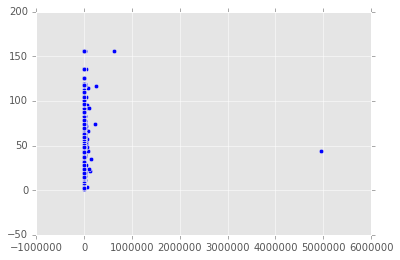

In [159]:
fig, ax = plt.subplots()
ax.scatter(loss_and_pluto_and_crime["Total Loss"], loss_and_pluto_and_crime["count"])
plt.show()

In [131]:
loss_and_pluto_and_crime.sort_values("Loss_Ratio")

,Policy_Number,Zip_Code,ISO_Class_Code,ISO_Coverage_Code,Written_Premium_Amt,Loss_Zip_Code,Total Loss,Loss_Ratio,Evaluation,ZipCode,...,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary,count,zipcode
0,1000365705151,10128,9531,23,692.0,10128.0,0.00,0.000000,1,10128,...,1890.385314,1032.549584,118.205148,4.620606,6.335322,0.665708,6.619606,0.111279,38,10128
44071,1000051395141,11204,64061,22,160.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204
44072,1000051395141,11204,64061,23,156.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204
44073,1000051395141,11204,64061,45,99.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204
44074,1000051395151,11204,64061,7,1.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204
44075,1000051395151,11204,64061,19,84.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204
44076,1000051395151,11204,64061,22,160.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204
44077,1000051395151,11204,64061,23,156.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204
44078,1000051395151,11204,64061,45,99.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204
44079,1000051634131,11204,52512,7,9.0,0.0,0.00,0.000000,1,11204,...,1908.795047,186.863331,19.707209,1.155031,1.305879,0.065858,2.167713,0.059561,31,11204


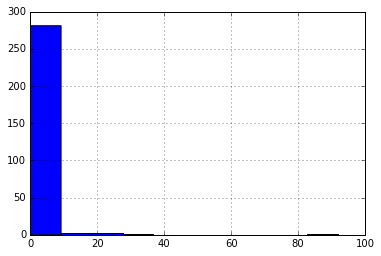

In [146]:
df_loss_ratio.groupby("ISO_Class_Code")["Loss_Ratio"].mean().sort_values(ascending=False).hist()